<a href="https://colab.research.google.com/github/KaanErdogdu/6_BootCamp_Lineer_Regresyon/blob/master/6_OLS_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [14]:
ev_fiyatlari = pd.read_csv('Ev_Fiyatlari.csv')
ev_fiyatlari.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd

In [15]:
ev_fiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
ev_fiyatlari["Street"] = ev_fiyatlari.Street.replace({'Pave':1, "Grvl":0})
print(ev_fiyatlari["Street"]) 


0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Street, Length: 1460, dtype: int64


In [17]:
ev_fiyatlari["SaleAge"] = ev_fiyatlari["YrSold"] - ev_fiyatlari['YearBuilt']
ev_fiyatlari["SaleAge"]

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: SaleAge, Length: 1460, dtype: int64

OverallQual

YearBuilt

GrLivArea

GarageArea




In [18]:
age_ev= ev_fiyatlari.groupby("SaleAge")["SalePrice"].sum()
age_ev

SaleAge
0      16915343
1      26691400
2       8706666
3       9113750
4       8161600
         ...   
127      285500
128      295000
129      265979
135       94000
136      122000
Name: SalePrice, Length: 122, dtype: int64

In [19]:
Y = ev_fiyatlari['SalePrice']
X = ev_fiyatlari[['OverallQual','YearBuilt','GrLivArea','GarageArea',"SaleAge","Street"]]

In [20]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [23081.55539496   494.58527015    55.67318484    57.8868527
   113.37688944  6928.35709178]
Sabit değer (bias): 
 -1057614.1030748312


In [22]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     733.8
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:09:57   Log-Likelihood:                -17527.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1453   BIC:                         3.510e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.058e+06   1.57e+06     -0.672      0.502   -4.15e+06    2.03e+06
OverallQual  2.308e+04   1164.612     19.819      0.000    2.08e+04    2.54e+04
YearBuilt     494.5853    783.761      0.631      0.528   -1042.838    2032.008
GrLivArea      55.6732      2.607     21.353      0.000      50.559      60.788
GarageArea     57.8869      6.295      9.196      0.000      45.539      70.235
SaleAge       113.3769    782.489      0.145      0.885   -1421.552    1648.305
Street       6928.3571   1.63e+04      0.424      0.672   -2.51e+04     3.9e+04
==============================================================================
Omnibus:                      421.416   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19474.608
Skew:                           0.555   Prob(JB):                         0.00
Kurtosis:                      20.858   Cond. No.                     3.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [25]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     601.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:11:03   Log-Likelihood:                -13988.
No. Observations:                1168   AIC:                         2.799e+04
Df Residuals:                    1161   BIC:                         2.803e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.596e+06   1.72e+06     -0.928      0.354   -4.97e+06    1.78e+06
OverallQual   2.27e+04   1288.540     17.614      0.000    2.02e+04    2.52e+04
YearBuilt     769.6145    856.859      0.898      0.369    -911.552    2450.781
GrLivArea      54.0217      2.838     19.033      0.000      48.453      59.590
GarageArea     60.4654      6.847      8.831      0.000      47.032      73.899
SaleAge       398.3676    855.629      0.466      0.642   -1280.384    2077.119
Street      -4495.1228   1.74e+04     -0.258      0.797   -3.87e+04    2.97e+04
==============================================================================
Omnibus:                      297.899   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18284.542
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                      22.383   Cond. No.                     3.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


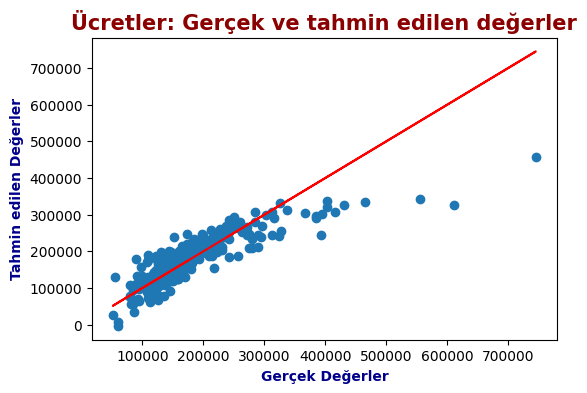

Ortalama Mutlak Hata (MAE)        : 28351.988258107685
Ortalama Kare Hata (MSE)          : 1927204041.7944157
Kök Ortalama Kare Hata (RMSE)     : 43899.93213883611
Ortalama Mutlak Yüzde Hata (MAPE) : 16.396472209132078


In [26]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [27]:
Y11 = ev_fiyatlari['SalePrice']
X11 = ev_fiyatlari[['OverallQual','GrLivArea','GarageArea']]

In [28]:
lrm11 = linear_model.LinearRegression()
lrm11.fit(X11, Y11)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('Değişkenler: \n', lrm11.coef_)
print('Sabit değer (bias): \n', lrm11.intercept_)

Değişkenler: 
 [27910.78508182    49.64931608    72.94782966]
Sabit değer (bias): 
 -99060.08677530524


In [30]:
X11 = sm.add_constant(X11)
results = sm.OLS(Y11, X11).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1377.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:13:15   Log-Likelihood:                -17562.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.515e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.906e+04   4837.368    -20.478      0.000   -1.09e+05   -8.96e+04
OverallQual  2.791e+04   1040.867     26.815      0.000    2.59e+04       3e+04
GrLivArea      49.6493      2.565     19.353      0.000      44.617      54.682
GarageArea     72.9478      6.138     11.884      0.000      60.907      84.989
==============================================================================
Omnibus:                      390.264   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15086.694
Skew:                           0.500   Prob(JB):                         0.00
Kurtosis:                      18.716   Cond. No.                     7.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X11, Y11, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train2.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test2.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [32]:
X_train2 = sm.add_constant(X_train2)

sonuclar2 = sm.OLS(y_train2, X_train2).fit()

sonuclar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1129.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:14:50   Log-Likelihood:                -14016.
No. Observations:                1168   AIC:                         2.804e+04
Df Residuals:                    1164   BIC:                         2.806e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.55e+04   5313.669    -17.972      0.000   -1.06e+05   -8.51e+04
OverallQual  2.745e+04   1146.987     23.929      0.000    2.52e+04    2.97e+04
GrLivArea      47.4603      2.767     17.151      0.000      42.031      52.890
GarageArea     76.5402      6.626     11.552      0.000      63.541      89.539
==============================================================================
Omnibus:                      279.920   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13692.102
Skew:                           0.039   Prob(JB):                         0.00
Kurtosis:                      19.773   Cond. No.                     7.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

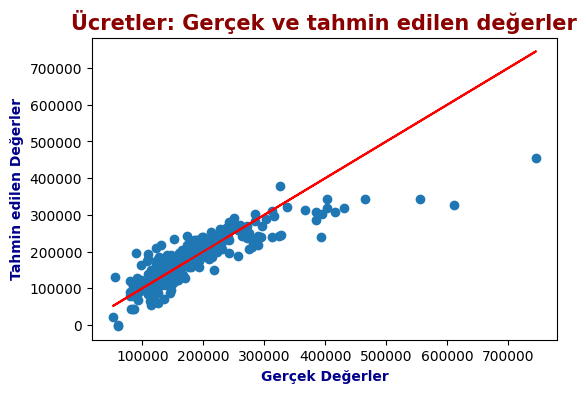

Ortalama Mutlak Hata (MSE)        : 29364.333281604093
Ortalama Kare Hata (MSE)          : 2021329032.4325805
Kök Ortalama Kare Hata (RMSE)     : 44959.19296909788
Ortalama Mutlak Yüzde Hata (MAPE) : 17.3692947681239


In [33]:
X_test2 = sm.add_constant(X_test2)

y_preds2 = sonuclar2.predict(X_test2)

plt.figure(dpi = 100)
plt.scatter(y_test2, y_preds2)
plt.plot(y_test2, y_test2, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test2, y_preds2)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test2, y_preds2)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test2, y_preds2)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test2 - y_preds2) / y_test2)) * 100))

Varsayım 1: Katsayılarda modelin doğrusallığı